# Unconstrained problems

In [1]:
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import show_options
import matplotlib.pyplot as plt

In [2]:
def plot_func(fun):
  plt.plot(fun)
  plt.xlabel('iterations')
  plt.ylabel('function value')
  plt.title('Current function value')
def contour_plot(Z, sol, n = 50):
  fig,ax=plt.subplots(1,1)
  cp = ax.contour(x1, x2, Z, range(n))
  sol = np.array(sol)
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.title('contour plot of f(x)')
  for i in range(len(sol) - 1):
    plt.annotate('', xy=sol[i + 1, :], xytext=sol[i, :],
                  arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                  va='center', ha='center')
  plt.show()

Problem 1: Generate $P ≻ 0, q$ randomly and let $f(x) = \frac{1}{2}x^TPx + q^Tx$

random matrix = 
 [[4.17022005e-01 7.20324493e-01]
 [1.14374817e-04 3.02332573e-01]]
eigen value of psdf matrix [0.76338386 0.02079587]
eigen value of pdf matrix [0.79417973 0.05159174]
pdf matrix = 
 [[0.7235706  0.21782525]
 [0.21782525 0.12220087]]
      fun: -1.4912323932877949
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00000000e+00, -2.22044606e-08])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([-2.9824647 ,  5.31629717])
Analytical solution = [[-2.98246479]
 [ 5.31629738]]


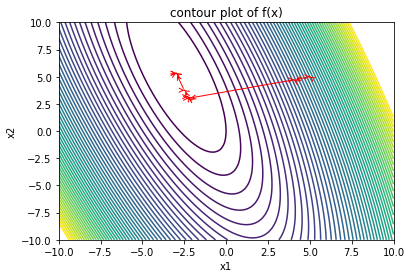

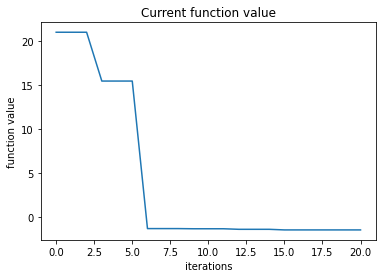

In [3]:
sol = []
fun = []
def objective_function(x, pdf):
  global sol, fun
  x1, x2 = x
  f = 1/2 * (pdf[0,0]*x1**2 + 2*pdf[0,1]*np.multiply(x1,x2) + pdf[1,1]*x2**2) + x1
  sol.append(x.tolist())
  fun.append(f)
  return f
np.random.seed(1)
M = np.random.rand(2,2)
print('random matrix = \n', M )
psdf = np.matmul(M,M.T)
[eig_value, eig_vector] = np.linalg.eig(psdf)
print('eigen value of psdf matrix', eig_value)
pdf = psdf + ((abs(min(eig_value)) + 0.01) * np.eye(2))
[eig_value, eig_vector] = np.linalg.eig(pdf)
print('eigen value of pdf matrix', eig_value)
print('pdf matrix = \n', pdf)
x0 = [5,5]
res = minimize(objective_function,x0, args = (pdf,), method = 'L-BFGS-B')
print(res)
analytical_sol = -np.matmul(np.linalg.inv(pdf),np.array([[1],[0]]))
print('Analytical solution =', analytical_sol)

xlist = np.linspace(-10, 10, 100)
ylist = np.linspace(-10, 10, 100)
x1, x2 = np.meshgrid(xlist, ylist)
Z =  1/2 * (pdf[0,0]*x1**2 + 2*pdf[0,1]*np.multiply(x1,x2) + pdf[1,1]*x2**2) + x1
contour_plot(Z, sol)
plot_func(fun)

Problem 2 (entropy function): $ f(x) = ∑_{i=1}^{n}x_ilogx_i$

      fun: -2.2072766470286513
 hess_inv: <6x6 LbfgsInvHessProduct with dtype=float64>
      jac: array([-4.4408921e-08, -4.4408921e-08, -4.4408921e-08,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 56
      nit: 6
     njev: 8
   status: 0
  success: True
        x: array([0.36787942, 0.36787942, 0.36787942, 0.36787943, 0.36787943,
       0.36787943])


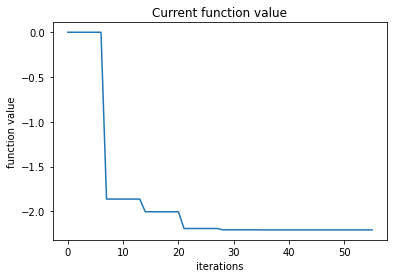

In [4]:
sol = []
fun = []
def objective_function(x):
  global sol, fun
  sol.append(x.tolist())
  f = float(sum(np.log(x)*x))
  fun.append(f)
  return  f
x0 = [1,1,1,1,1,1]
res = minimize(objective_function,x0, method='l-bfgs-b')
print(res)
plot_func(fun)

Problem 3: $f(x) = x_1^2 + x_1x_2 +1.5x_2^2 - 2log(x_1) -log(x_2)$

      fun: 2.527862507531603
 hess_inv: array([[ 0.23733366, -0.02928629],
       [-0.02928629,  0.12868872]])
      jac: array([-1.69873238e-06, -1.49011612e-07])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([0.8944268 , 0.44721362])


<ipython-input-5-a3a8ed74c312>:17: RuntimeWarning: divide by zero encountered in log
  Z =  x1**2 + x1*x2 + 1.5*x2**2 - 2*np.log(x1) - np.log(x2)


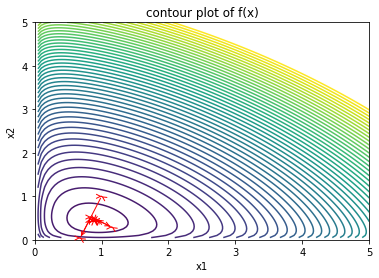

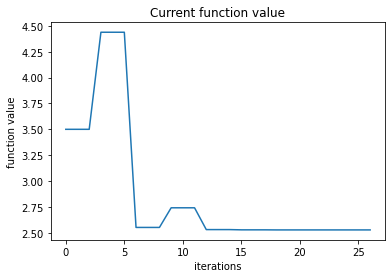

In [5]:
sol = []
fun = []
def objective_function(x):
  x1, x2 = x
  global sol, fun
  sol.append(x.tolist())
  f = x1**2 + x1*x2 + 1.5*x2**2 - 2*np.log(x1) - np.log(x2)
  fun.append(f)
  return  f
x0 = [1,1]
res = minimize(objective_function,x0)
print(res)

xlist = np.linspace(0, 5, 100)
ylist = np.linspace(0, 5, 100)
x1, x2 = np.meshgrid(xlist, ylist)
Z =  x1**2 + x1*x2 + 1.5*x2**2 - 2*np.log(x1) - np.log(x2)
contour_plot(Z, sol)
plot_func(fun)

Problem 4: $f(x) = x_1^2 - x_1x_2 + 2x_2^2 - 2x_1 + e^{x_1+x_2}$

In [6]:
sol = []
fun = []
def objective_function(x):
  x1, x2 = x
  global sol, fun
  sol.append(x.tolist())
  f = x1**2 - x1*x2 + 2*x2**2 - 2*x1 - np.exp(x1+x2)
  fun.append(f)
  return  f
x0 = [0.71,-0.3]
res = minimize(objective_function,x0, method='l-bfgs-b')
print(res)

      fun: -inf
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.7868178 , -3.41681776])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 60
      nit: 0
     njev: 20
   status: 2
  success: False
        x: array([ 0.71, -0.3 ])


<ipython-input-6-f19a85f4a426>:7: RuntimeWarning: overflow encountered in exp
  f = x1**2 - x1*x2 + 2*x2**2 - 2*x1 - np.exp(x1+x2)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


Probelm 4 (Rosenbrock function): $f(x) = 100(x_2 - x_1^{2})^{2} + (1-x_1)^2$

Iter    X1          X2        f(X)     
   1    1.052573    1.121469   0.021150
   2    0.998232    0.989166   0.005335
   3    1.026640    1.055529   0.000947
   4    1.018342    1.036892   0.000338
   5    1.011584    1.022582   0.000186
   6    1.006360    1.012077   0.000087
   7    1.000993    1.001774   0.000006
   8    1.000130    1.000249   0.000000
   9    1.000004    1.000009   0.000000
  10    0.999996    0.999992   0.000000
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 69
         Gradient evaluations: 19
optimal point for resenbrock function = [0.99999581 0.99999163]


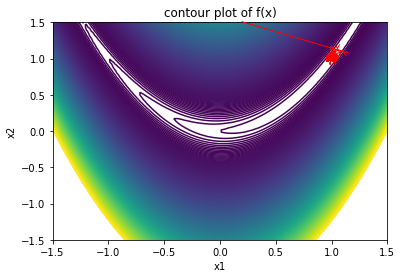

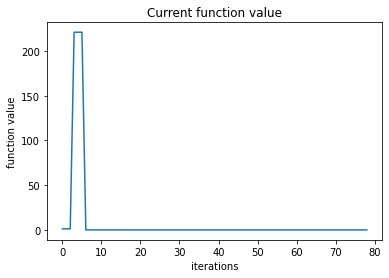

In [7]:
import numpy as np
from scipy.optimize import fmin_bfgs

Nfeval = 1
sol = []
fun = []
def rosen(x): #Rosenbrock function
    sol.append(x.tolist())
    f = 100*(x[1] - x[0]**2)**2 + (1 - x[0])**2
    fun.append(f)
    return f

def callbackF(Xi):
    global Nfeval
    print('{0:4d}   {1: 3.6f}   {2: 3.6f}  {3: 3.6f}'.format(Nfeval, Xi[0], Xi[1], rosen(Xi)))
    Nfeval += 1

print('{0:4s}   {1:9s}   {2:9s}  {3:9s}'.format('Iter', ' X1', ' X2', 'f(X)')) 
x0 = np.array([1.1, 1.1], dtype=np.double)
[xopt, fopt, gopt, Bopt, func_calls, grad_calls, warnflg] = \
    fmin_bfgs(rosen, 
              x0, 
              callback=callbackF, 
              maxiter=2000, 
              full_output=True, 
              retall=False)
print('optimal point for resenbrock function =', xopt)
sol = np.array(sol)
xlist = np.linspace(-1.5, 1.5, 100)
ylist = np.linspace(-1.5, 1.5, 100)
x1, x2 = np.meshgrid(xlist, ylist)
Z = 100*(x2 - x1**2)**2 + (1 - x1)**2
contour_plot(Z, sol, n = 500)
plot_func(fun)

# Linear Program (LP)
Linear Programming ที่ solve โดย scipy จะต้องจัดให้อยู่ใน form ดังนี้
$$ \begin{equation}
\begin{array}{rrclcl}
\displaystyle \min_{x} & {c^Tx}\\
\textrm{s.t.} & A_{ub}x ≼ b_{ub} \\
& A_{eq} = b_{eq}    \\
& l ≼ x ≼ u\\
\end{array}
\end{equation} $$

โดยที่ $x$ คือ decision variable $c, b_ub, b_eq, l, u$ คือ vector และ $ A_{ub}, A_{eq} $ คือ matrix

In [3]:
from scipy.optimize import linprog
import numpy as np
import pandas as pd

Problem 1:

 $\begin{equation}
\begin{array}{rrclcl}
\displaystyle \min_{x} & {c^Tx}\\
\textrm{s.t.} & \mathbf{1}^Tx ≤ 1 \\
& x ≽ 0    \\
\end{array}
\end{equation}$


จาก objective function และ constraints จะพบว่าเมื่อ $c_i ≥ 0$ ควรเลือกให้ค่า $x_i=0$ และในกรณีที่กลุ่มของ $c_i ≤ 0$ เราควรเลือกให้ $x_j = 1$ โดย $j$ คือ index ของ $c$ ที่มีค่าน้อยที่สุด จึงได้ analytical solution ดังนี้


* anlytical solution: 
$
x_i =  \left\{
\begin{array}{ll}
      1 , i = \displaystyle argmin_{i} & {c_i} \\
      0 , \text{ otherwise} \\
\end{array} 
\right.  $

* Formulate the problem 

  จาก constraints จะได้ $\mathbf{1}^Tx ≤ 1, -x ≼ 0$ จึงจะได้
  $A_{ub} = \begin{bmatrix}
  \mathbf{1}^T  \\
  \mathbf{-I_{n}}
  \end{bmatrix}$, $b_{ub} = \begin{bmatrix}
  1  \\
  \mathbf{0}
  \end{bmatrix}$



In [4]:
np.random.seed(4)
n = 5
c = np.random.randn(n)
#A_ub = np.concatenate((np.ones((1,n)), -np.eye(n)), 0)
A_ub = np.block([[np.ones((1,n))], [-np.eye(n)]])
b_ub = np.concatenate((np.array([1]), np.zeros((n))),0)
x = linprog(c, A_ub = A_ub, b_ub = b_ub)
df = pd.DataFrame({'c':c.tolist(), 'x':x.x.tolist()})
print(df)

          c             x
0  0.050562  2.900666e-13
1  0.499951  6.757807e-13
2 -0.995909  1.000000e+00
3  0.693599  1.704419e-12
4 -0.418302  4.185407e-12


Problem 2:

 $\begin{equation}
\begin{array}{rrclcl}
\displaystyle \min_{x} & {c^Tx}\\
\textrm{s.t.} & l ≼ x ≼ u \\
\end{array}
\end{equation}$

จาก objective function และ constraints จะเห็นว่าเมื่อ $c_i > 0$ ควรให้ $x_i$ มีค่าต่ำที่สุด และเมื่อ $c_i < 0$ ควรเลือกให้ $x_i$ มีค่าสูงที่สุด จึงได้ 

* anlytical solution: 
$
x_i =  \left\{
\begin{array}{ll}
      l , c_i ≥ 0 \\
      u , c_i ≤ 0 \\
\end{array} 
\right.  $
* Formulate the problem

  จาก constraints จะได้ $x ≼ u, -x ≼ -l$ จึงได้ $A_{ub} = \begin{bmatrix}
  \mathbf{I_n}  \\
  \mathbf{-I_{n}}
  \end{bmatrix}, b_{ub} = \begin{bmatrix}
  u  \\
  -l
  \end{bmatrix}$

In [6]:
np.random.seed(1)
n = 8
c = np.random.randn(n)
l = 1*np.ones((n))
u = 2*np.ones((n))
#A_ub = np.concatenate((np.eye(n),-np.eye(n)), 0)
A_ub = np.block([[np.eye(n)], [-np.eye(n)]])
b_ub = np.concatenate((u,-l), 0)
x = linprog(c, A_ub, b_ub)
df = pd.DataFrame({'c':c.tolist(), 'x':x.x.tolist()})
print('l =', l)
print('u =', u)
print(df)

l = [1. 1. 1. 1. 1. 1. 1. 1.]
u = [2. 2. 2. 2. 2. 2. 2. 2.]
          c    x
0  1.624345  1.0
1 -0.611756  2.0
2 -0.528172  2.0
3 -1.072969  2.0
4  0.865408  1.0
5 -2.301539  2.0
6  1.744812  1.0
7 -0.761207  2.0


Problem 3:

 $\begin{equation}
\begin{array}{rrclcl}
\displaystyle \min_{x} & {c^Tx}\\
\textrm{s.t.} & \|x\|_∞ ≤ 1 \\
\end{array}
\end{equation}$

จาก constraint หมายความว่า $max(|x_i|)≤1$ ซึ่งหมายความว่า $x$ ทุกตัวจะต้องมีค่ามากกว่า -1 แต่น้อยกว่า 1 ($-1≤x_i≤1$) ซึ่งเมื่อต้องการทำให้ objective function มีค่าน้อยที่สุด จึงควรให้ $x_i = 1$ เมื่อ $c_i$ มีค่าติดลบ และควรให้ $x_i = -1$ เมื่อ $c_i$ มีค่าเป็นบวก จึงได้

* anlytical solution: 
$
x_i =  \left\{
\begin{array}{ll}
      -1 , c_i ≥ 0 \\
       +1 , c_i ≤ 0 \\
\end{array} 
\right.  $

* Formulate the problem
  จาก constraint จะได้ $-1≤x_i≤1$ จึงได้ $l = -1, u = 1$

In [7]:
np.random.seed(1)
n = 10
c = np.random.randn(n)
x = linprog(c, bounds = (-1,1))
df = pd.DataFrame({'c':c.tolist(), 'x':x.x.tolist()})
print(df)

          c    x
0  1.624345 -1.0
1 -0.611756  1.0
2 -0.528172  1.0
3 -1.072969  1.0
4  0.865408 -1.0
5 -2.301539  1.0
6  1.744812 -1.0
7 -0.761207  1.0
8  0.319039 -1.0
9 -0.249370  1.0


Problem 4:

 $\begin{equation}
\begin{array}{rrclcl}
\displaystyle \min_{x} & {c^Tx}\\
\textrm{s.t.} & 0 ≤ x_1 ≤ x_2 ≤ ... ≤ x_n ≤ 1 \\
\end{array}
\end{equation}$

* formulate the problem
  พิจารณาอสมการทีละอสมการจะได้ $-x_1≤0, x_1-x_2≤0,..., x_{n-1}-x_n≤0, x_n \le1$ จึงได้ ทั้งหมด n+1 inquality constraints ดังนั้น $A_{ub} ∈ \mathbb{R}^{n+1×n}, b_{ub} ∈ \mathbb{R}^{n+1}$
  
  $A_{ub} = \begin{bmatrix}
  -1 & 0 & 0&... & 0  \\
  1 & -1 & 0 & ... & 0 \\
  0 & 1 & -1 & ... & 0 \\
  . \\
  . \\
  . \\
  0 & 0 & ... & 1 & -1 \\
  0 & 0 & ... & 0 & 1\\
  \end{bmatrix}, b_{ub} = \begin{bmatrix}
  0 \\
  0 \\
  . \\
  . \\
  . \\
  1
  \end{bmatrix}$


In [10]:
np.random.seed(42)
n = 5
c = np.block([-10, np.random.randn(n-1)])
a1 = -np.eye(n) + np.pad(np.eye(n-1), (1,1), 'constant', constant_values=(0))[:-1,1:]
#a2 = np.concatenate((np.zeros((1,n-1)),np.ones((1,1))), 1)
#A_ub = np.concatenate((a1,a2),0)
A_ub = np.block([[a1],[np.zeros(n-1),1]])
b_ub = np.concatenate((np.zeros(n),np.ones(1)),0)
x = linprog(c, A_ub = A_ub, b_ub = b_ub)
df = pd.DataFrame({'c':c.tolist(), 'x':x.x.tolist()})
#print(A_ub.shape, b_ub.shape)
print(df)

           c    x
0 -10.000000  1.0
1   0.496714  1.0
2  -0.138264  1.0
3   0.647689  1.0
4   1.523030  1.0


Problem 5: 

generate a tall $ A ∈ \mathbb{R}^{m×n} $ and $ y ∈ \mathbb{R}^{n}$ randomly and then

 $\begin{equation}
\begin{array}{rrclcl}
\displaystyle \min_{x} & {\|Ax - y\|_∞}\\
\end{array}
\end{equation}$

* formulate the problem
  
  จาก $A = \begin{bmatrix}
  a_1^T \\
  a_2^T \\
  . \\
  . \\
  . \\
  a_n^T
  \end{bmatrix}$, $Ax = \begin{bmatrix}
  a_1^Tx \\
  a_2^Tx \\
  . \\
  . \\
  . \\
  a_n^Tx
  \end{bmatrix}$ และ  $\|Ax-y\|_∞ ≤ t$ จึงได้ $-t ≤ \|a_i^Tx - y_i\|≤t$

  วิธีการ formulate จะใช้เทคนิค epigraph มาช่วย ซึ่งก็คือจะให้ $f(x) ≤ t$ แล้วเปฃี่ยนเป็นปัญาการทำให้ค่า $t$ มีค่าน้อยที่สุดแทน จึงได้
   $$\begin{equation}
\begin{array}{rrclcl}
\displaystyle \min_{t,x} & {t}\\
\textrm{s.t.} & -y ≤ Ax-tI ≤ y \\
\end{array}
\end{equation}$$

  ซึ่งจะเห็นว่าตัวแปรที่ต้องการหาค่า optimal จะเพิ่มขึ้นมา 1 ตัวซึ่งก็คือตัวแปร t จึงได้
  $A_{ub} = \begin{bmatrix}
  A & -\mathbf{1}\\
  -A &  -\mathbf{1}
  \end{bmatrix}, b_{ub} = \begin{bmatrix}
   y\\
  -y
  \end{bmatrix}$



In [14]:
np.random.seed(1)
m = 4
n = 3
A = np.random.randn(m,n)
y = np.random.randn(m)
one = np.ones((m,1))
#a1 = np.concatenate((A,-one),1)
#a2 = np.concatenate((-A,-one),1)
#A_ub = np.concatenate((a1,a2),0)
A_ub = np.block([[A, -one], [-A, -one]])
#b_ub = np.concatenate((y,-y),0)
b_ub = np.block([y,-y])
#c = np.concatenate((np.zeros(n), np.ones(1)), 0)
c = np.block([np.zeros(n), 1])
x = linprog(c, A_ub = A_ub, b_ub = b_ub)
x

     con: array([], dtype=float64)
     fun: 0.5815301555349336
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([5.59511515e-09, 1.16306030e+00, 1.16306031e+00, 9.76895453e-10,
       1.16306031e+00, 1.24831850e-08, 6.02359118e-09, 1.16306031e+00])
  status: 0
 success: True
       x: array([0.32800784, 0.1639558 , 0.32827211, 0.58153016])

#Quadratic Program

Quadratic Programming ที่ solve โดย cvxopt จะต้องจัดให้อยู่ใน form ดังนี้
$$ \begin{equation}
\begin{array}{rrclcl}
\displaystyle \min_{x} & {\frac{1}{2}x^TPx + q^Tx}\\
\textrm{s.t.} & Gx ≼ h \\
& Ax = b    \\
\end{array}
\end{equation} $$

โดยที่ $x$ คือ decision variable $q, h$ คือ vector และ $ G, A $ คือ matrix

In [11]:
from cvxopt import matrix, solvers
import numpy as np

Problem 1:  

$\begin{equation}
\begin{array}{rrclcl}
\displaystyle \min_{x} & {\frac{1}{2}x^TPx - q^Tx}\\
\end{array}
\end{equation}$

* Analytical solution: $ x = -P^{-1}q $

In [25]:
# generate pdf matrix
np.random.seed(1)
v = np.random.randn(2,1)
sym = v @ v.T
eig_val, eig_vec = np.linalg.eig(sym)
P = sym + (abs(min(eig_val))+0.01)*np.eye(2)
P = 2*matrix(P)
q = matrix([1.,1.])
# solve QP
sol=solvers.qp(P,q)
print('solution from QP solver', sol['x'])
print('analytical solution', -np.linalg.inv(np.array(P))@np.array(q))

solution from QP solver [-2.28e+01]
[-6.02e+01]

analytical solution [[-22.79302694]
 [-60.2466142 ]]


Problem 2:

Unconstrained Problem

$\begin{equation}
\begin{array}{rrclcl}
\displaystyle \min_{x} & {\|Ax-y\|_2^2}\\
\end{array}
\end{equation}$

* Analytical solution$: x = (A^TA)^{-1}A^Ty $
* formulate the problem

  $\|Ax-y\|_2^2 = (Ax-y)^T(Ax-y) = x^TA^TAx -x^TA^Ty - y^TAx +y^Ty$ 
  
  จาก $y^Ty$ ไม่เกี่ยวข้องกับตัวแปรที่ต้องการจะ minimize จึงสามารถตัดออกไปได้ และ $x^Ty = y^Tx$ จึงได้ $y^TAx = (Ax)^Ty$ ทำให้ได้
  
  $\|Ax-y\|_2^2 = x^TA^TAx - 2y^TAx$ 

  ดังนั้น $P =A^TA, q = -2y^TA$ 

In [18]:
np.random.seed(2)
m = 5
n = 2
A = np.random.randn(m,n)
y = np.random.randn(m,1)
P = 2*matrix(np.matmul(A.T,A))
q = -2*matrix(np.matmul(A.T,y))
sol = solvers.qp(P,q)
print('optimal solution: \n',sol['x'])
print('cost objective:',sol['primal objective'])
analytic_sol = np.matmul(np.matmul(np.linalg.inv(np.matmul(A.T,A)),A.T),y)
print('analytical solution: \n', np.matmul(np.matmul(np.linalg.inv(np.matmul(A.T,A)),A.T),y))

optimal solution: 
 [-5.68e-01]
[ 6.35e-01]

cost objective: -6.512935325667601
analytical solution: 
 [[-0.56786066]
 [ 0.63456378]]


In [19]:
sol

{'status': 'optimal',
 'x': <2x1 matrix, tc='d'>,
 'y': <0x1 matrix, tc='d'>,
 'z': <0x1 matrix, tc='d'>,
 's': <0x1 matrix, tc='d'>,
 'gap': 0.0,
 'relative gap': 0.0,
 'primal objective': -6.512935325667601,
 'dual objective': -6.512935325667601,
 'primal slack': 0.0,
 'dual slack': 0.0,
 'primal infeasibility': 0.0,
 'dual infeasibility': 1.1350109414835109e-16,
 'iterations': 0}

Problem 2.1: 

$ \begin{equation}
\begin{array}{rrclcl}
\displaystyle \min_{x} & {\|Ax - y\|_2^2}\\
\textrm{s.t.} & \|x\|_1 \le α \\
\end{array}
\end{equation}$

* formulate the problem

  $P =A^TA, q = -2y^TA$
  
  จาก constraints จะได้
  $G = \begin{bmatrix}
  \mathbf{I}\\
  -\mathbf{I}
  \end{bmatrix}, h = \begin{bmatrix}
  \mathbf{1}\\
  \mathbf{1}
  \end{bmatrix}$


In [13]:
np.random.seed(2)
m = 5
n = 2
A = np.random.randn(m,n)
y = np.random.randn(m,1)
P = 2*matrix(np.matmul(A.T,A))
q = -2*matrix(np.matmul(A.T,y))
alpha = 0.25
h = alpha*np.block([[np.ones((n,1))], [np.ones((n,1))]])
h = matrix(h)
G = np.block([[np.eye(n)], [-np.eye(n)]])
G = matrix(G)
sol = solvers.qp(P,q,G,h)

     pcost       dcost       gap    pres   dres
 0: -6.4449e+00 -6.8351e+00  8e+00  3e+00  3e-16
 1: -6.1841e+00 -5.7146e+00  1e+00  5e-01  4e-17
 2: -3.8504e+00 -4.5443e+00  7e-01  2e-16  5e-16
 3: -4.3032e+00 -4.3183e+00  2e-02  6e-17  2e-16
 4: -4.3161e+00 -4.3162e+00  2e-04  9e-17  1e-16
 5: -4.3162e+00 -4.3162e+00  2e-06  4e-17  1e-16
Optimal solution found.


In [14]:
print(sol['x'])

[-2.50e-01]
[ 2.50e-01]



Problem 2.2:

$ \begin{equation}
\begin{array}{rrclcl}
\displaystyle \min_{x} & {\|Ax - y\|_2^2}\\
\textrm{s.t.} & l ≼ x ≼ u \\
\end{array}
\end{equation}$

In [15]:
np.random.seed(2)
m = 5
n = 2
A = np.random.randn(m,n)
y = np.random.randn(m,1)
P = 2*matrix(np.matmul(A.T,A))
q = -2*matrix(np.matmul(A.T,y))
alpha = 0.25
h = alpha*np.block([[3*np.ones((n,1))], [2*np.ones((n,1))]])
h = matrix(h)
G = np.block([[np.eye(n)], [-np.eye(n)]])
G = matrix(G)
sol = solvers.qp(P,q,G,h)

     pcost       dcost       gap    pres   dres
 0: -6.4490e+00 -9.3282e+00  9e+00  2e+00  1e-16
 1: -6.3765e+00 -7.2881e+00  9e-01  3e-16  2e-16
 2: -6.4630e+00 -6.5116e+00  5e-02  0e+00  1e-16
 3: -6.4719e+00 -6.4737e+00  2e-03  1e-16  8e-17
 4: -6.4721e+00 -6.4721e+00  2e-05  2e-16  7e-17
 5: -6.4721e+00 -6.4721e+00  2e-07  2e-16  3e-17
Optimal solution found.


In [16]:
print(sol['x'])

[-5.00e-01]
[ 6.54e-01]



Problem 3: Soft-margin SVM ??

$ \begin{equation}
\begin{array}{rrclcl}
\displaystyle \min_{w,b,z} & {\frac{1}{2}\|w\|_2^2 + λ\mathbf{1}^Tz}\\
\textrm{s.t.} & y_i(x_i^Tw+b) ≥ 1-z_i, i =1,2,..,N  \\
& z ≽0 \\
\end{array}
\end{equation}$

define $ u = (w, b, z)^T $, N = #samples, n = #features
from QP: $f(x) = \frac{1}{2}u^TPu + q^Tu, P ∈ \mathbb{R}^{(N+n+1)×(N+n+1)}, q ∈ \mathbb{R}^{(N+n+1)} $

In [87]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [64]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2,
                    random_state=0)

In [133]:
N = 100
n = 2
P = matrix(np.block([[np.eye(n), np.zeros((n,N+1))], [np.zeros((N+1,n)), np.zeros((N+1,N+1))]]))
q = matrix(np.block([np.zeros(n+1), 1*np.ones(N)]))
h = matrix(np.block([-np.ones(N), np.zeros(N)]))
G = matrix(np.block([[-y.reshape(N,1)*X , -y.reshape(N,1),-np.eye(N)],[np.zeros((N,n+1)), -np.eye(N)]]))

In [139]:
np.block([-np.ones(N), np.zeros(N)])

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [134]:
G

<200x103 matrix, tc='d'>

In [135]:
sol = solvers.qp(P,q,G,h)

     pcost       dcost       gap    pres   dres
 0: -5.0000e+01  1.5000e+02  4e+02  3e+00  1e+01
 1:  7.8870e+01  3.9648e+01  4e+01  3e-02  1e-01
 2:  5.0647e+01  4.9048e+01  2e+00  1e-03  5e-03
 3:  5.0007e+01  4.9990e+01  2e-02  1e-05  5e-05
 4:  5.0000e+01  5.0000e+01  2e-04  1e-07  5e-07
 5:  5.0000e+01  5.0000e+01  2e-06  1e-09  5e-09
Optimal solution found.


In [136]:
w = np.array(sol['x'][:n])
b = np.array(sol['x'][n])
w, b, sum(np.array(sol['x'][n+1:]))

(array([[ 5.98663604e-22],
        [-1.13817857e-21]]), array(3.04406872), array([50.00000065]))

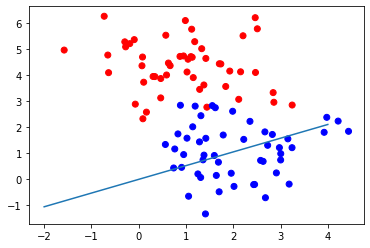

In [126]:
c = ['r' if yy==0 else 'b' for yy in y]
x1 = np.arange(-2,5)
x2 = -w[0]*x1/w[1] # - b/w[1]
plt.scatter(X[:,0], X[:,1], c=c)
plt.plot(x1,x2)